### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. You **ONLY** change the parts of the code we asked you to, nowhere else (change only the coding parts saying `# YOUR CODE HERE`, nothing else);
6. Don't add any new cells to this notebook;
7. Fill in your group number and the full names of the members in the cell below;
8. Make sure that you are not running an old version of IPython (we provide you with a cell that checks this, make sure you can run it without errors).

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

---

Group number and member names:

In [ ]:
GROUP = "21"
NAME1 = "Hai Dinh"
NAME2 = "Zeeshan Dar"

Make sure you can run the following cell without errors.

In [ ]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# HA1 - Cats and dogs

<img src="http://lghttp.32478.nexcesscdn.net/80E972/organiclifestylemagazine/wp-content/uploads/2015/10/Cats-and-Dogs.jpg" alt="Cats and dogs" style="width: 5000px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colored images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

As a way of helping you speed up the training process, each group gets 6 hours of access to an instance in Google Cloud with a K80 GPU. Take a look at the [Instructions folder](https://github.com/JulianoLagana/deep-machine-learning/tree/master/Instructions) to understand how to connect to this instance and use our tools there. You're free to use this resource as you see fit, but if you run out of hours you'll need a late day to obtain more (and you can only do this once).

In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-4) in your own computer (these tasks can be solved only on the CPU), and leave most of the available hours for solving tasks 5-6, and refining your best model further (and, if you have the spare hours, experiment a bit!).

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance.

Tips:
- If you get errors saying you've exhausted the GPU resources, well, then you exhausted the GPU resources ;). However, sometimes that's because TensorFlow didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough credits on google cloud to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

# For neural net architecture 
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.optimizers import adam

# Callbacks for training
from keras.callbacks import TensorBoard, EarlyStopping

# For image processing
from keras.preprocessing.image import ImageDataGenerator

# Store the home path
home_path = os.getcwd()

Using TensorFlow backend.


---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats) and download the data from there. You should download both the test and train folders together in one zip file (by clicking the download all button). The split ratio between training and validation has not been made, you'll need to do it yourself. The `test.zip` file contains unlabeled data, so that participants in the contest are not able to train on this set.

For this assignment you should use [data generators](https://keras.io/preprocessing/image/) to load the images to your CPU/GPU memory. Because of this, your folder structure for the data should conform to the folder structure expected by the data generators (i.e. the samples should be separated into one folder for each class). Furthermore, we ask you to first start with a smaller subset of the data (1/5 of the number of samples), in order to test different models faster.

This means that you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      Cats        Dogs       Cats        Dogs       Cats        Dogs       Cats        Dogs

The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`. We provide you a notebook that shows how to achieve this ("Create project structure.ipynb"), starting from the original `all.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

We advise you to use 30% of the data as validation data in the smaller dataset. However, for the larger dataset, you should decide how to split between training and validation. Please specify your splits in the following cells.

For the larger subset, what was the training/validation split that you decided to use?

**% Samples in the training set:**

In [2]:
# Counting images
os.chdir(home_path + '/data/train/cats')
n_train_cats = len(os.listdir())
os.chdir(home_path + '/data/train/dogs')
n_train_dogs = len(os.listdir())
os.chdir(home_path + '/data/val/cats')
n_val_cats = len(os.listdir())
os.chdir(home_path + '/data/val/dogs')
n_val_dogs = len(os.listdir())

# Sum up the images
n_val = n_val_cats + n_val_dogs
n_train = n_train_cats + n_train_dogs
n_total = n_val + n_train

# Print output for the training set
print('Train set with {} images of cats.'.format(n_train_cats))
print('Train set with {} images of dogs.'.format(n_train_dogs))
print('Train set with total {} images.'.format(n_train))
print('Percentage of samples for the training samples is {}%.'.format(100*n_train/n_total))

Train set with 10000 images of cats.
Train set with 10000 images of dogs.
Train set with total 20000 images.
Percentage of samples for the training samples is 80.0%.


**% Samples in the validation set:**

In [3]:
# Print output for the validation set
print('Validation set with {} images of cats.'.format(n_val_cats))
print('Validation set with {} images of dogs.'.format(n_val_dogs))
print('Validation set with total {} images.'.format(n_val))
print('Percentage of samples for the validation set is {}%.'.format(100*n_val/n_total))

Validation set with 2500 images of cats.
Validation set with 2500 images of dogs.
Validation set with total 5000 images.
Percentage of samples for the validation set is 20.0%.


Fill in the dataset paths (to be used later by your data generators):

In [14]:
os.chdir(home_path)
train_path = home_path + '/data/small_train'
val_path = home_path + '/data/small_val'

---
Once you have the expected folder structure, create two data generators for automatically generating batches from the images in your smaller subset of data. Don't use any [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/), but feel free to preprocess the data as you see fit. After instantiating them, run the `flow_from_directory` method with the desired arguments.

Hints:
- The specified `batch_size` should be chosen so that your don't run out of memory.
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. If so, take a look at the argument `target_size` for the `flow_from_directory` method of data generators.
- Resizing the images to a smaller size while loading them can be beneficial.

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
image_shape = (128, 128, 3)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(128, 128),
        color_mode="rgb",
        batch_size=32,
        class_mode='binary')

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(128, 128),
        color_mode="rgb",
        batch_size=32,
        class_mode='binary')

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


---
## 2. Training

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).

Tip:
- If Tensorflow is your backend, your `input_shape` is always `(img_width, img_height, 3)` (i.e. channels **last**)

In [6]:
def modelA():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=image_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Train your model using the `fit_generator` method and the two data generators you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Tips:
- Usually the bottleneck is when loading the images from the disk. To speed up training, make sure to take a look at the arguments `workers` and `use_multiprocessing` of `fit_generator`.
- You don't have to set the argument `steps_per_epoch` to the number of batches in an epoch. Instead, you can choose a lower number to obtain more frequent prints about the current loss and accuracy of your model (but then have in mind that you're not actually training for the number of epochs you specify in `epochs`).

In [7]:
modelA = modelA()
hist_modelA = modelA.fit_generator(train_generator,
                                  validation_data=val_generator,
                                  epochs=15,
                                  use_multiprocessing=True,
                                  workers=4)

Epoch 1/15
110/110 [==============================] - 23s 213ms/step - loss: 0.7093 - acc: 0.5346 - val_loss: 0.6604 - val_acc: 0.5900
Epoch 2/15
110/110 [==============================] - 21s 191ms/step - loss: 0.6350 - acc: 0.6426 - val_loss: 0.6129 - val_acc: 0.6847
Epoch 3/15
110/110 [==============================] - 20s 185ms/step - loss: 0.5292 - acc: 0.7438 - val_loss: 0.5808 - val_acc: 0.6920
Epoch 4/15
110/110 [==============================] - 21s 189ms/step - loss: 0.4066 - acc: 0.8248 - val_loss: 0.5912 - val_acc: 0.6973
Epoch 5/15
110/110 [==============================] - 21s 189ms/step - loss: 0.3087 - acc: 0.8817 - val_loss: 0.6647 - val_acc: 0.6860
Epoch 6/15
110/110 [==============================] - 21s 191ms/step - loss: 0.2280 - acc: 0.9149 - val_loss: 0.7379 - val_acc: 0.6827
Epoch 7/15
110/110 [==============================] - 21s 187ms/step - loss: 0.1463 - acc: 0.9561 - val_loss: 0.8471 - val_acc: 0.6707
Epoch 8/15
110/110 [==============================] - 2

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

Hint:
- The `fit_generator` method returns a `history` object.

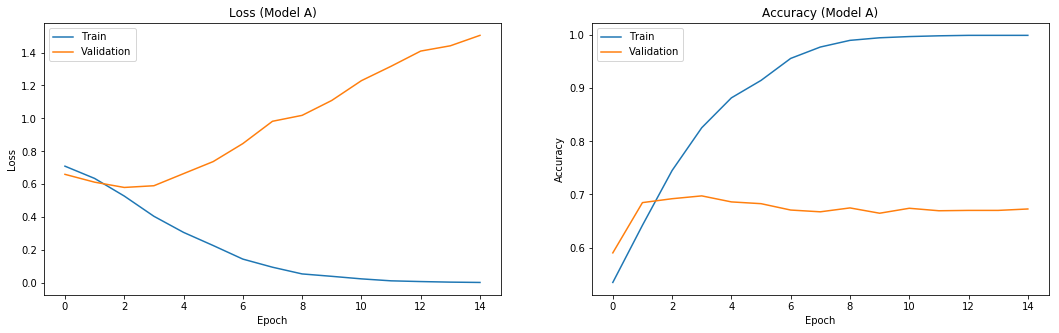

In [14]:
# Get the history dict and set figure size
history = hist_modelA.history
fig = plt.figure(figsize=(18,5))

# Plotting the loss
plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss (Model A)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plotting the accuracy
plt.subplot(1,2,2)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy (Model A)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.show()

Based on these, what would you suggest for improving your model? Why?

**Your answer:** Model A is a very simple neural network with only 1 conv layer and one fully connected layer. The number of filters for the conv layer is only 16, not very large either. And with this model, we manage to get the training accuracy up to almost 100%. However, this model suffers heavily from overfitting, because validation accuracy levels off already from the 3rd epoch at around 69%. Hence, the most straight-forward way to improve the model is to either introduce some kind of regularizations, or using a dropout layer. Since our model is already very simple with not so many neurons, introducing dropout here doesn't make much sense, since dropout would turn off quite many neurons. So we decided to improve the model by simply introducing L2-regularization on both hidden layers that we have. The expectation is that regularization will prevent overfitting, making the training accuracy rise more slowly such that the validation accuracy has time to pick up. We do this in Model B below.

---
## 3. Improving your initial model

Improve your initial model according to you answer above. Write the new definition in the cell below and train it.

In [18]:
def modelB():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), kernel_regularizer=l2(0.008), activation='relu', input_shape=image_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.008)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

modelB = modelB()
hist_modelB = modelB.fit_generator(train_generator,
                                  validation_data=val_generator,
                                  epochs=15,
                                  use_multiprocessing=True,
                                  workers=4)

Epoch 1/15
110/110 [==============================] - 25s 230ms/step - loss: 0.8555 - acc: 0.5147 - val_loss: 0.7735 - val_acc: 0.5647
Epoch 2/15
110/110 [==============================] - 23s 210ms/step - loss: 0.7537 - acc: 0.5163 - val_loss: 0.7373 - val_acc: 0.5673
Epoch 3/15
110/110 [==============================] - 25s 231ms/step - loss: 0.7335 - acc: 0.5579 - val_loss: 0.7295 - val_acc: 0.6013
Epoch 4/15
110/110 [==============================] - 25s 224ms/step - loss: 0.7242 - acc: 0.5432 - val_loss: 0.7058 - val_acc: 0.6033
Epoch 5/15
110/110 [==============================] - 26s 236ms/step - loss: 0.7112 - acc: 0.5682 - val_loss: 0.7223 - val_acc: 0.5227
Epoch 6/15
110/110 [==============================] - 26s 236ms/step - loss: 0.7105 - acc: 0.5581 - val_loss: 0.7108 - val_acc: 0.5520
Epoch 7/15
110/110 [==============================] - 24s 216ms/step - loss: 0.7047 - acc: 0.5865 - val_loss: 0.6956 - val_acc: 0.5527
Epoch 8/15
110/110 [==============================] - 2

How does the model perform, compared to the initial model? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

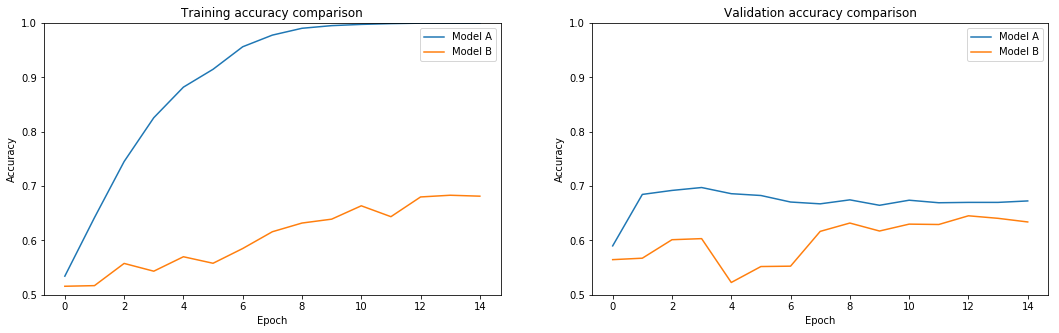

In [19]:
# Get the history dicts and set figure size
historyA = hist_modelA.history
historyB = hist_modelB.history
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(historyA['acc'])
plt.plot(historyB['acc'])
plt.title('Training accuracy comparison')
plt.ylim((0.5, 1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model B'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(historyA['val_acc'])
plt.plot(historyB['val_acc'])
plt.title('Validation accuracy comparison')
plt.ylim((0.5, 1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model A', 'Model B'])

# Show the plots
plt.show()

Did your results improve? Explain why, or why not.

**Your answer:** Despite the accuracy of the training drops down from 100% to around 69%, the validation accuracy still stays very much the same compared to Model A, even a bit lower. This means that Model B suffers less from overfitting, but its performance on the validation set still doesn't improve at all. This might be because even though we add the regularizers, the neural network in Model B is still very simple and shallow, and thus might not be able to capture the good features that will make the classifier more accurate. To improve this, we can try to have a deeper neural network with more conv layers, and also more filters.

---
## 4. Obtaining the *best* model

Continue to improve your model architecture by comparing the value of the metrics you're interested in both the training and validation set. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here. Save the optimization history (i.e. the `history` object returned by the `fit_generator`). You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to ping-pong, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [32]:
def modelC():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=image_shape, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), input_shape=image_shape, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

modelC = modelC()
hist_modelC = modelC.fit_generator(train_generator,
                                  validation_data=val_generator,
                                  epochs=20,
                                  use_multiprocessing=True,
                                  workers=4)

Epoch 1/20
110/110 [==============================] - 11s 101ms/step - loss: 0.7561 - acc: 0.5423 - val_loss: 0.7074 - val_acc: 0.5393
Epoch 2/20
110/110 [==============================] - 8s 76ms/step - loss: 0.6724 - acc: 0.6368 - val_loss: 0.6332 - val_acc: 0.6807
Epoch 3/20
110/110 [==============================] - 8s 77ms/step - loss: 0.6176 - acc: 0.6988 - val_loss: 0.6716 - val_acc: 0.6300
Epoch 4/20
110/110 [==============================] - 8s 76ms/step - loss: 0.5866 - acc: 0.7165 - val_loss: 0.5893 - val_acc: 0.7247
Epoch 5/20
110/110 [==============================] - 9s 77ms/step - loss: 0.5692 - acc: 0.7336 - val_loss: 0.5980 - val_acc: 0.7287
Epoch 6/20
110/110 [==============================] - 8s 74ms/step - loss: 0.5478 - acc: 0.7562 - val_loss: 0.6487 - val_acc: 0.6867
Epoch 7/20
110/110 [==============================] - 8s 75ms/step - loss: 0.5399 - acc: 0.7650 - val_loss: 0.5965 - val_acc: 0.7300
Epoch 8/20
110/110 [==============================] - 8s 76ms/step 

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

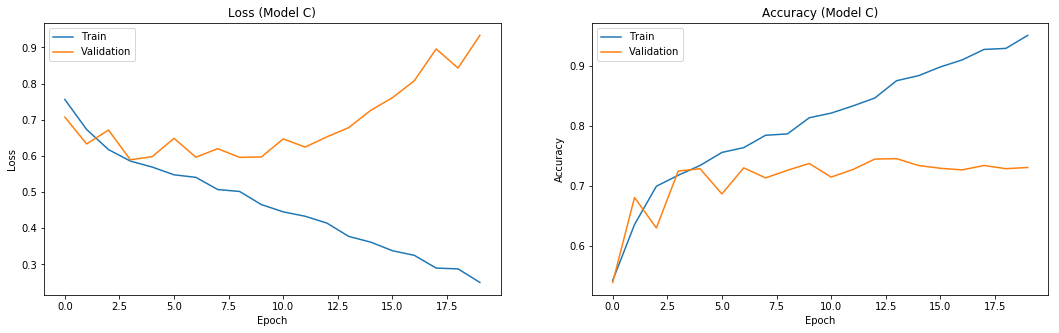

In [33]:
# Get the history dict and set figure size
history = hist_modelC.history
fig = plt.figure(figsize=(18,5))

# Plotting the loss
plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss (Model C)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plotting the accuracy
plt.subplot(1,2,2)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy (Model C)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.show()

[Save your model](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) to disk as a HDF5 file (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual `.h5` files you create are not relevant to your ping-pong submission.

In [34]:
modelC.save('modelC.h5')

---
## 5. Transfer Learning

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected + classification layers). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the VGG16 model without the top layers, from the `applications` submodule from Keras. Make sure to also load the weights obtained from the ImageNet pretraining.

In [4]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)


Create a new model with the layers you want to add on top of VGG. The kernels and bias in these layers should be initialized randomly.

In [5]:
x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu', kernel_initializer='random_uniform', bias_initializer='random_uniform')(x)
predictions = Dense(1, activation = 'sigmoid')(x)

Now add the new model on top of VGG.

Tip:
- The VGG model you loaded from the `applications` submodule is from the [`Model`](https://keras.io/models/model/) class, not the `Sequential` class, so it doesn't have some methods you're used to (like `add`, for instance). It might be helpful to read [this introduction to the Model class](https://keras.io/getting-started/functional-api-guide/).

In [6]:
transfer_model = Model(input=vgg_model.input, output=predictions)

/home/student/anaconda3/envs/dml_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


### 5.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the `trainable` attribute of them to `False`.

In [7]:
for layer in vgg_model.layers:
    layer.trainable = False

Create the callbacks (if any) you would like to use, compile the model and train it.

In [8]:
transfer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_transfer_model = transfer_model.fit_generator(train_generator,
                                                   validation_data=val_generator,
                                                   epochs=20,
                                                   use_multiprocessing=True,
                                                   workers=4)

Epoch 1/20
110/110 [==============================] - 32s 293ms/step - loss: 0.5731 - acc: 0.8022 - val_loss: 0.3239 - val_acc: 0.8587
Epoch 2/20
110/110 [==============================] - 16s 143ms/step - loss: 0.2339 - acc: 0.9009 - val_loss: 0.4603 - val_acc: 0.7927
Epoch 3/20
110/110 [==============================] - 16s 143ms/step - loss: 0.1664 - acc: 0.9349 - val_loss: 0.4656 - val_acc: 0.7967
Epoch 4/20
110/110 [==============================] - 16s 144ms/step - loss: 0.1409 - acc: 0.9449 - val_loss: 0.3508 - val_acc: 0.8593
Epoch 5/20
110/110 [==============================] - 16s 142ms/step - loss: 0.0993 - acc: 0.9634 - val_loss: 0.4067 - val_acc: 0.8427
Epoch 6/20
110/110 [==============================] - 16s 143ms/step - loss: 0.0583 - acc: 0.9827 - val_loss: 0.3820 - val_acc: 0.8647
Epoch 7/20
110/110 [==============================] - 16s 144ms/step - loss: 0.0341 - acc: 0.9937 - val_loss: 0.3908 - val_acc: 0.8633
Epoch 8/20

110/110 [==============================] - 

Create one figure with two axes. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

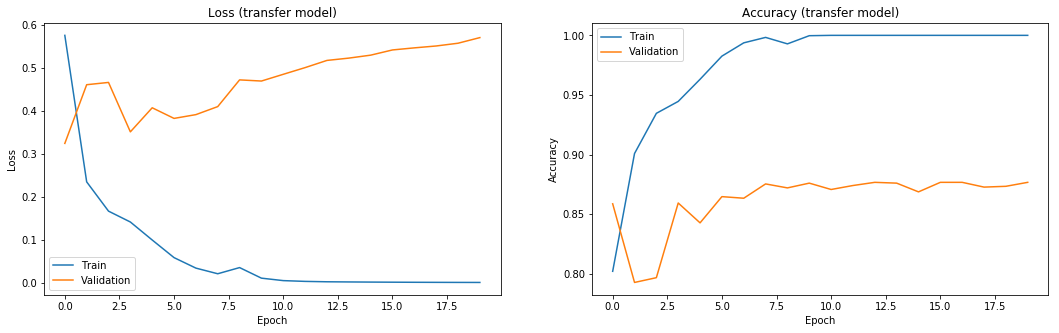

In [12]:
# Get the history dict and set figure size
history = hist_transfer_model.history
fig = plt.figure(figsize=(18,5))

# Plotting the loss
plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss (transfer model)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plotting the accuracy
plt.subplot(1,2,2)
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy (transfer model)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.show()

How does the model perform, compared to the model obtained in step 4? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

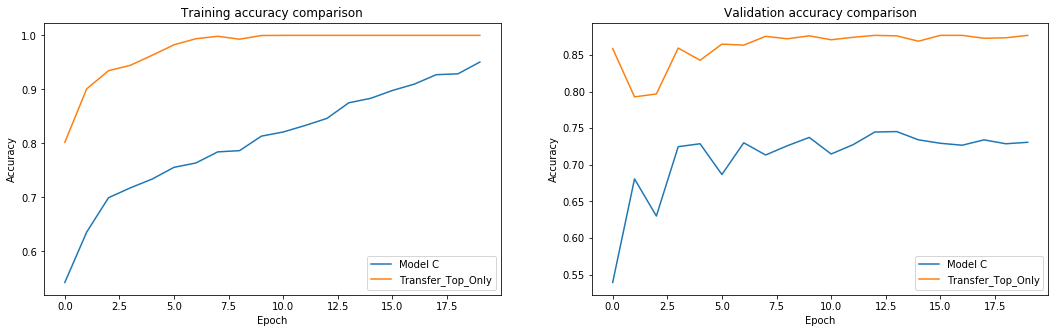

In [36]:
# Get the history dicts and set figure size
history1 = hist_modelC.history
history2 = hist_transfer_model.history
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(history1['acc'])
plt.plot(history2['acc'])
plt.title('Training accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model C', 'Transfer_Top_Only'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(history1['val_acc'])
plt.plot(history2['val_acc'])
plt.title('Validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model C', 'Transfer_Top_Only'])

# Show the plots
plt.show()

Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Explain how you evaluated this.

**Your answer:** Transfer learning clearly works better than starting from scratch. From the plots above, both the training accuracy and the validation accuracy are higher in transfer learning than in model C. Not only are the results better, but we also save a lot of time, since the effort spent on transfer learning is way less. Starting from scratch is hard, because we need a lot of time and expertise to find a good architecture. We also have to fine tune the model with the right hyper-parameters. On the other hand, we have don't have to do so much work in transfer learning, especially in this step where we only need to train the top layers, and our results are already much better than training from scratch.

What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:**  Difference is that ImageNet dataset is a multi-class dataset with many more categories, and way more training data (maybe not per class, but in general). Thus the images on ImageNet is way more diverse, and doesn't really target Dogs and Cats in particular.

Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** There are a lot of images on ImageNet that are related to dogs and cats or just animals in general. Hence, when VGG was trained on the ImageNet, the neural network has already picked up a lot of features that allow us to differentiate between cats and dogs. So the weights that were learned from VGG can then be transfered to classifying images that we have in this assignment. Of course, since the images are not identical, we cannot simply use the weights in VGG, but we have to re-train it a little bit (especially with the top layers). But the re-training is much quicker than training everything from scratch.

In which scenario would transfer learning be unsuitable?

**Your answer:** Transfer learning is unsuitable when the 2 datasets are vastly different in every way. For example, models that learn from images of cars shouldn't be used to learn a model that aims to differentiate between dogs and cats. This is because cars images are vastly different from animals images.

Save the model to a HDF5 file.

In [1]:
transfer_model.save('trans_learning_top_only.h5')

### 5.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers.

Tip:
- Always recompile your model after changing anything in it!

In [17]:
model = load_model('trans_learning_top_only.h5')
for layer in model.layers:
    layer.trainable = True
model.compile(optimizer= adam(lr= 1e-5), loss='binary_crossentropy', metrics=['accuracy'])    

Create the callbacks (if any) you would like to use for this training here, compile the model, and train it.

Tip:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [18]:
hist_fine_transfer_model = model.fit_generator(train_generator,
        epochs=10,
        validation_data=val_generator,
        use_multiprocessing=True,
        workers=4) 

Epoch 1/10
110/110 [==============================] - 43s 394ms/step - loss: 0.0146 - acc: 0.9952 - val_loss: 0.5620 - val_acc: 0.8713
Epoch 2/10
110/110 [==============================] - 37s 341ms/step - loss: 0.0187 - acc: 0.9932 - val_loss: 0.5414 - val_acc: 0.8860
Epoch 3/10
110/110 [==============================] - 37s 341ms/step - loss: 0.0625 - acc: 0.9770 - val_loss: 0.4525 - val_acc: 0.8993
Epoch 4/10
Epoch 3/10
110/110 [==============================] - 37s 339ms/step - loss: 0.0076 - acc: 0.9977 - val_loss: 0.4765 - val_acc: 0.8940
Epoch 4/10
Epoch 5/10
110/110 [==============================] - 37s 341ms/step - loss: 7.4315e-04 - acc: 1.0000 - val_loss: 0.4579 - val_acc: 0.8987
Epoch 5/10
Epoch 6/10
110/110 [==============================] - 37s 340ms/step - loss: 2.4997e-04 - acc: 1.0000 - val_loss: 0.4573 - val_acc: 0.9027
Epoch 7/10
Epoch 6/10
110/110 [==============================] - 37s 340ms/step - loss: 1.8897e-04 - acc: 1.0000 - val_loss: 0.4601 - val_acc: 0.9013

How does the model perform, compared to the model trained with freezed layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

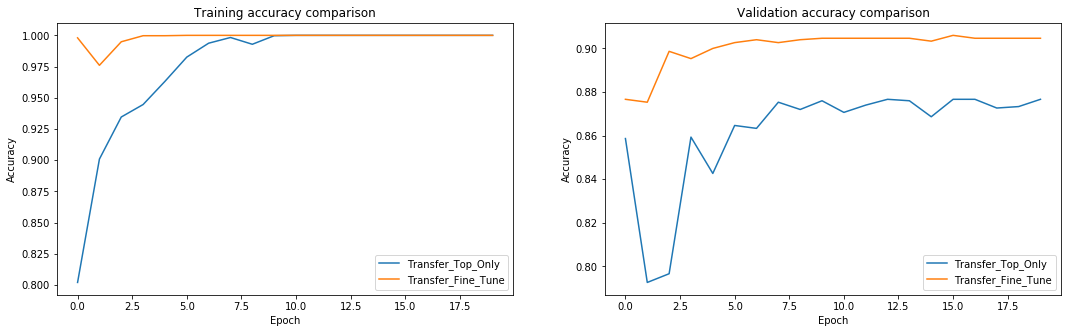

In [30]:
# Get the history dicts and set figure size
history1 = hist_transfer_model.history
history2 = hist_fine_transfer_model.history
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(history1['acc'])
plt.plot(history2['acc'])
plt.title('Training accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Transfer_Top_Only', 'Transfer_Fine_Tune'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(history1['val_acc'])
plt.plot(history2['val_acc'])
plt.title('Validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Transfer_Top_Only', 'Transfer_Fine_Tune'])

# Show the plots
plt.show()

Did the model's performance improve? Why (why not)?

**Your answer:** Yes the performance improves by quite a lot, especially in the validation set. In transfer-top-only model, we have only fine-tuned the top layers architecture of the network, but the weights of all the bottom layers were frozen. However, in the transfer-fine-tune model, we allow the network to optimize the weights in the bottom layers too, thus allowing the network to pick up features that target specifically our dogs-cats dataset, while removing away features that are not neccessary

Save the model to a HDF5 file.

In [37]:
model.save('trans_learning_full.h5')

### 5.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas, and consider comparing them using tensorboard. When you're happy with one architecture, copy it in the cell below and train it here.

In [2]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)
x = Dense(1024, activation='relu',
          kernel_initializer='random_uniform', 
          bias_initializer='random_uniform')(vgg_model.output)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation = 'sigmoid')(x)

# First pass to train top layers only (bottom layers are frozen)
model = Model(input=vgg_model.input, output=predictions)
for layer in vgg_model.layers:
    layer.trainable = False
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(train_generator,
                             validation_data=val_generator,
                             epochs=20,
                             use_multiprocessing=True,
                             workers=4)

# Second pass to train all the layers
for layer in model.layers:
    layer.trainable = True
model.compile(optimizer=adam(lr= 1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit_generator(train_generator,
        epochs=15,
        validation_data=val_generator,
        use_multiprocessing=True,
        workers=4)   

How does the model perform, compared to the model trained in step 5.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# We have run the code above before and got around 94 percent accuracy on the validation set.
# However, we accidently click re-run the above cell, which makes all the output disappear.
# And since it takes quite a bit of time to run the above code, we did not have time on the cloud to rerun it again.

Save the model to a HDF5 file.

In [ ]:
model.save('best_trans_learning.h5')

## 6. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data generators, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [8]:
model = load_model('trans_learning_full.h5')

os.chdir(home_path)
train_path = home_path + '/data/train'
val_path = home_path + '/data/val'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
image_shape = (128, 128, 3)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(128, 128),
        color_mode="rgb",
        batch_size=128,
        class_mode='binary')

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(128, 128),
        color_mode="rgb",
        batch_size=128,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Create the callbacks you would like to use and train your model. This optimization might take a long time, so TensorBoard is advised ;).

In [9]:
tb = TensorBoard(log_dir='./logs/best_model')

model.compile(optimizer= adam(lr= 1e-5), loss='binary_crossentropy', metrics=['accuracy']) 

history_best = model.fit_generator(train_generator,
        epochs=15,
        validation_data=val_generator,
        use_multiprocessing=True,
        workers=4,
        callbacks=[tb])  

Epoch 1/15
157/157 [==============================] - 195s 1s/step - loss: 0.2180 - acc: 0.9349 - val_loss: 0.1445 - val_acc: 0.9426
Epoch 2/15
157/157 [==============================] - 179s 1s/step - loss: 0.0806 - acc: 0.9702 - val_loss: 0.1221 - val_acc: 0.9526
Epoch 3/15
157/157 [==============================] - 179s 1s/step - loss: 0.0376 - acc: 0.9880 - val_loss: 0.1364 - val_acc: 0.9476
Epoch 4/15
Epoch 3/15
157/157 [==============================] - 178s 1s/step - loss: 0.0185 - acc: 0.9954 - val_loss: 0.1221 - val_acc: 0.9614
Epoch 5/15
157/157 [==============================] - 178s 1s/step - loss: 0.0063 - acc: 0.9995 - val_loss: 0.1319 - val_acc: 0.9612
Epoch 6/15
Epoch 5/15
157/157 [==============================] - 178s 1s/step - loss: 0.0028 - acc: 0.9999 - val_loss: 0.1384 - val_acc: 0.9608
Epoch 7/15
157/157 [==============================] - 178s 1s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1389 - val_acc: 0.9636
Epoch 8/15
157/157 [===========================

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

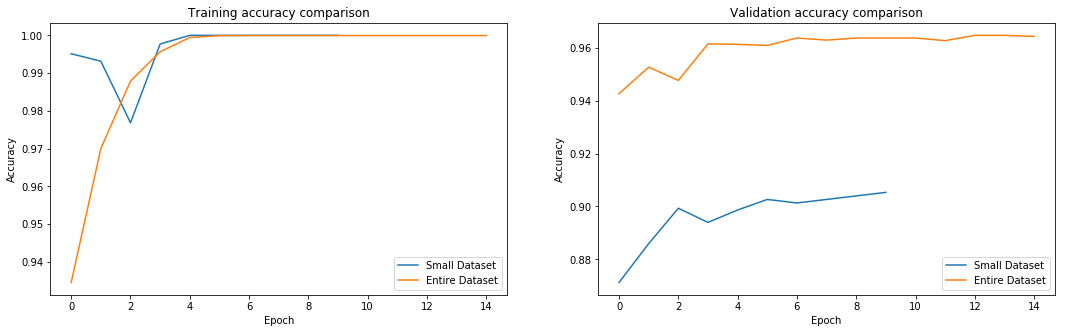

In [19]:
# Get the history dicts and set figure size
history1 = hist_fine_transfer_model.history
history2 = history_best.history
fig = plt.figure(figsize=(18,5))

# Plotting the training accuracy
plt.subplot(1,2,1)
plt.plot(history1['acc'])
plt.plot(history2['acc'])
plt.title('Training accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Small Dataset', 'Entire Dataset'])

# Plotting the validation accuracy
plt.subplot(1,2,2)
plt.plot(history1['val_acc'])
plt.plot(history2['val_acc'])
plt.title('Validation accuracy comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Small Dataset', 'Entire Dataset'])

# Show the plots
plt.show()

What can you conclude from these plots?

**Your answer:** The more data that we have the more material that we have to train on and lesser the chance having over-fitting and thus the model can generalize better on the unseen data in the validation set.

## 7. Evaluation on test set

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. Instead, we'll create a .csv file containing the predictions for each sample, and submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Tip:
- There is a sample_submission file available for download in the same place where you downloaded the data from. Take a look at it to better understand what is the expected format here.

Hints:
- The Python module `os` has a `listdir` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.
- Keras has a submodule called `preprocessing.image`, with some handy functions (for instance `load_img` and `img_to_array`)

In [2]:
model = load_model('best_model.h5')
from os import listdir
from os.path import basename
from keras.preprocessing import image
import pandas as pd
import numpy

test_path = home_path + '/data/test'
df = pd.DataFrame(columns=['id','label'])

for f in listdir(test_path):
    id_ = os.path.splitext(f)[0]
    test_image= image.load_img(test_path + '/' + f, target_size = (128, 128)) 
    test_image = image.img_to_array(test_image) / 255
    test_image = test_image.reshape(1, 128, 128, 3)
    result = model.predict(test_image)
    df = df.append({'id': id_,'label': result[0][0]}, ignore_index=True)

df.to_csv('output.csv') 
print(df)

          id         label
0       5721  4.883121e-12
1      10011  9.999992e-01
2       5886  1.000000e+00
3      10765  1.000000e+00
4       4656  1.000000e+00
5       4642  8.841846e-04
6       6281  8.616138e-01
7       3715  1.000000e+00
8      12159  6.329750e-11
9       6773  1.000000e+00
10      8051  1.000000e+00
11      7542  1.000000e+00
12     10658  1.000000e+00
13      8650  3.487452e-09
14      4633  7.913641e-08
15      7632  1.096711e-22
16      8941  4.408847e-13
17       642  1.596603e-06
18      7563  1.000000e+00
19       811  5.105434e-09
20      6458  3.301027e-05
21     10786  1.611468e-09
22      4761  1.999984e-13
23      3052  1.000000e+00
24      3698  5.936631e-14
25      5027  6.874989e-09
26      5254  2.674052e-06
27      3913  1.000000e+00
28      5995  1.000000e+00
29      7000  1.000000e+00
...      ...           ...
12470   4935  1.000000e+00
12471   2263  9.999932e-01
12472   8796  1.000000e+00
12473   6129  6.957444e-06
12474   8629  1.000000e+00
1

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, so submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition). Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** 0.32383

What was the username you used for this submission?

**Your answer:** Zeeshan Dar